In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [3]:
data=pd.read_csv("mammographic_masses.data",names=["bi-rads","age","shape","margin","density","severity"])
data_n=data.values #extracting only the matrix of values 

data = data[(data['bi-rads']!='?') & (data['age']!='?') & (data['shape']!='?') & (data['margin']!='?') & (data['density']!='?') & (data['severity']!='?')]
data = data.astype(int)
print(data.shape)

X = data[["bi-rads","age","shape","margin","density"]]
y=data[["severity"]].values
X

##a few examples from the dataset 

(830, 6)


,bi-rads,age,shape,margin,density
0,5,67,3,5,3
2,5,58,4,5,3
3,4,28,1,1,3
8,5,57,1,5,3
10,5,76,1,4,3
...,...,...,...,...,...
949,4,47,2,1,3
950,4,56,4,5,3
951,4,64,4,5,3
952,5,66,4,5,3


In [4]:
one_hot_shapes = pd.get_dummies(X['shape'])
one_hot_shapes

,1,2,3,4
0,0,0,1,0
2,0,0,0,1
3,1,0,0,0
8,1,0,0,0
10,1,0,0,0
...,...,...,...,...
949,0,1,0,0
950,0,0,0,1
951,0,0,0,1
952,0,0,0,1


In [5]:
X = X.join(one_hot_shapes)

In [6]:
X.drop('shape', axis=1, inplace=True)
X

,bi-rads,age,margin,density,1,2,3,4
0,5,67,5,3,0,0,1,0
2,5,58,5,3,0,0,0,1
3,4,28,1,3,1,0,0,0
8,5,57,5,3,1,0,0,0
10,5,76,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...
949,4,47,1,3,0,1,0,0
950,4,56,5,3,0,0,0,1
951,4,64,5,3,0,0,0,1
952,5,66,5,3,0,0,0,1


In [7]:
X.rename(columns={1: 'round', 2: 'oval', 3: 'lobular', 4: 'irregular'}, inplace=True)
X

,bi-rads,age,margin,density,round,oval,lobular,irregular
0,5,67,5,3,0,0,1,0
2,5,58,5,3,0,0,0,1
3,4,28,1,3,1,0,0,0
8,5,57,5,3,1,0,0,0
10,5,76,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...
949,4,47,1,3,0,1,0,0
950,4,56,5,3,0,0,0,1
951,4,64,5,3,0,0,0,1
952,5,66,5,3,0,0,0,1


In [8]:
one_hot_margin = pd.get_dummies(X['margin'])
one_hot_margin


,1,2,3,4,5
0,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
8,0,0,0,0,1
10,0,0,0,1,0
...,...,...,...,...,...
949,1,0,0,0,0
950,0,0,0,0,1
951,0,0,0,0,1
952,0,0,0,0,1


In [9]:
X = X.join(one_hot_margin)

In [10]:
X.drop('margin', axis=1, inplace=True)
X

,bi-rads,age,density,round,oval,lobular,irregular,1,2,3,4,5
0,5,67,3,0,0,1,0,0,0,0,0,1
2,5,58,3,0,0,0,1,0,0,0,0,1
3,4,28,3,1,0,0,0,1,0,0,0,0
8,5,57,3,1,0,0,0,0,0,0,0,1
10,5,76,3,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
949,4,47,3,0,1,0,0,1,0,0,0,0
950,4,56,3,0,0,0,1,0,0,0,0,1
951,4,64,3,0,0,0,1,0,0,0,0,1
952,5,66,3,0,0,0,1,0,0,0,0,1


In [11]:
X.rename(columns={1: 'circumscribed', 2: 'microlobulated', 3: 'obscured', 4: 'ill-defined', 5: 'spiculated'}, inplace=True)
X

,bi-rads,age,density,round,oval,lobular,irregular,circumscribed,microlobulated,obscured,ill-defined,spiculated
0,5,67,3,0,0,1,0,0,0,0,0,1
2,5,58,3,0,0,0,1,0,0,0,0,1
3,4,28,3,1,0,0,0,1,0,0,0,0
8,5,57,3,1,0,0,0,0,0,0,0,1
10,5,76,3,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
949,4,47,3,0,1,0,0,1,0,0,0,0
950,4,56,3,0,0,0,1,0,0,0,0,1
951,4,64,3,0,0,0,1,0,0,0,0,1
952,5,66,3,0,0,0,1,0,0,0,0,1


In [12]:
SeverityBR= pd.DataFrame({"bi-rads":data["bi-rads"], "severity":data["severity"]})

BiRads=[1,2,3,4,5]

for n in BiRads:
    SBRnumber=SeverityBR[SeverityBR["bi-rads"]== n]
    l=len(SBRnumber)
    Positive=len(SBRnumber[SBRnumber["severity"] == 1])
    Negative=len(SBRnumber[SBRnumber["severity"] == 0])
    if l== 0:
        print(0.0, f'% of the cases marked with Bi-Rads = {n} are positive')
    else:
        print(round(((Positive/l)*100),2), f'% of the cases marked with Bi-Rads = {n} are positive')

0.0 % of the cases marked with Bi-Rads = 1 are positive
0.0 % of the cases marked with Bi-Rads = 2 are positive
16.67 % of the cases marked with Bi-Rads = 3 are positive
22.01 % of the cases marked with Bi-Rads = 4 are positive
90.22 % of the cases marked with Bi-Rads = 5 are positive


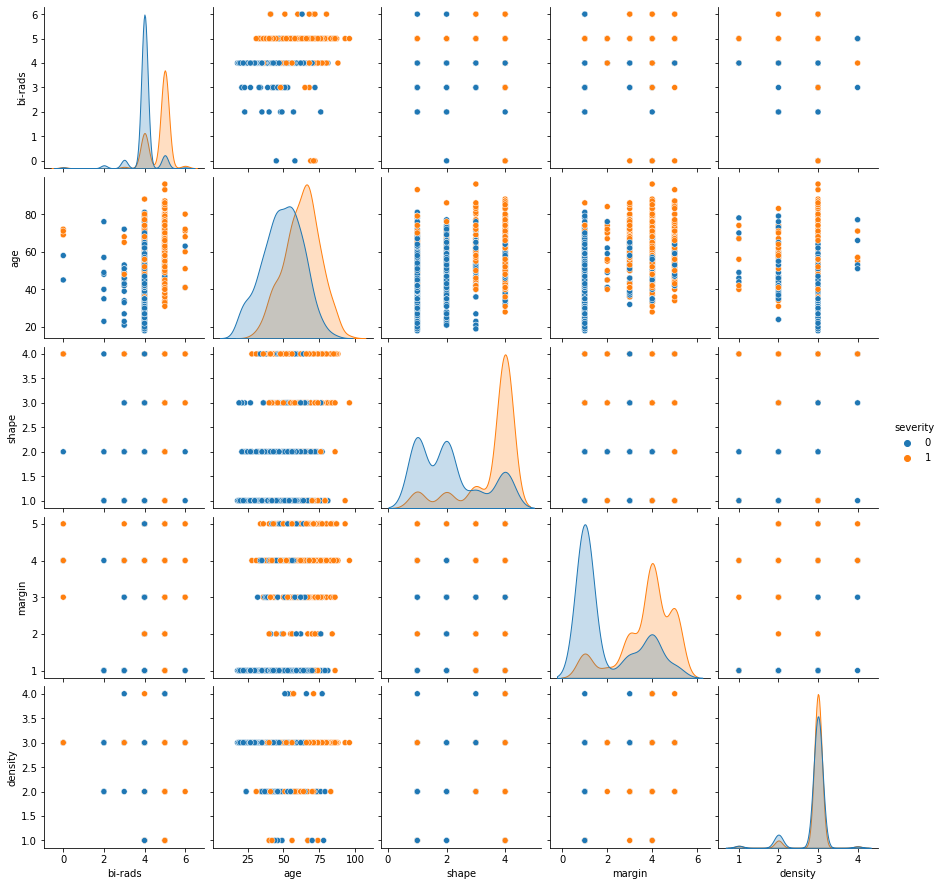

In [13]:
sns.pairplot(data,diag_kind="kde",hue="severity")

In [14]:
#poly = sklearn.preprocessing.PolynomialFeatures(degree=3)
#X = poly.fit_transform(X)

In [15]:
#X = sklearn.preprocessing.normalize(X)
#X

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV


max_it = np.arange(3000, 11000, 1000)
c = [0.001, 0.01, 0.1, 1, 10, 100]
l1 = np.arange(0, 1.1, 0.1)

param_grid = {
    'max_iter': max_it,
    'C': c,
    #'solver': ['saga', 'liblinear', 'newton-cg', 'lbfgs', 'sag'],
    #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    #'l1_ratio': l1
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

clf = HalvingGridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, factor=3, random_state=1, cv=5, error_score=0.0, scoring='')

#clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring="precision_macro", cv=5)
clf.fit(X_train, y_train.ravel())

print("Best parameters set found on development set:\n")
print(clf.best_params_)


print("Classification Report:\n")
y_true, y_pred = y_test.ravel(), clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()


'''
clf = LogisticRegression(penalty='none', max_iter=max_it)
clfL2 = LogisticRegression(penalty="l2", max_iter=max_it)
clfL1 = LogisticRegression(solver='liblinear', penalty="l1", max_iter=max_it)
clfEN = LogisticRegression(solver='saga', penalty="elasticnet", l1_ratio=.5, max_iter=max_it)

cv = 10
scores_clf = cross_val_score(clf, X, y.ravel(), cv=cv)
scores_clfL2 = cross_val_score(clfL2, X, y.ravel(), cv=cv)
scores_clfL1 = cross_val_score(clfL1, X, y.ravel(), cv=cv)
scores_clfEN = cross_val_score(clfEN, X, y.ravel(), cv=cv)

print("No Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" % (scores_clf.mean(), scores_clf.std()))
print("L2 Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfL2.mean(), scores_clfL2.std()))
print("L1 Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfL1.mean(), scores_clfL1.std()))
print("EN Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfEN.mean(), scores_clfEN.std()))
'''

Best parameters set found on development set:

{'C': 1, 'max_iter': 7000}
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       169
           1       0.79      0.81      0.80       163

    accuracy                           0.80       332
   macro avg       0.80      0.80      0.80       332
weighted avg       0.80      0.80      0.80       332




'\nclf = LogisticRegression(penalty=\'none\', max_iter=max_it)\nclfL2 = LogisticRegression(penalty="l2", max_iter=max_it)\nclfL1 = LogisticRegression(solver=\'liblinear\', penalty="l1", max_iter=max_it)\nclfEN = LogisticRegression(solver=\'saga\', penalty="elasticnet", l1_ratio=.5, max_iter=max_it)\n\ncv = 10\nscores_clf = cross_val_score(clf, X, y.ravel(), cv=cv)\nscores_clfL2 = cross_val_score(clfL2, X, y.ravel(), cv=cv)\nscores_clfL1 = cross_val_score(clfL1, X, y.ravel(), cv=cv)\nscores_clfEN = cross_val_score(clfEN, X, y.ravel(), cv=cv)\n\nprint("No Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" % (scores_clf.mean(), scores_clf.std()))\nprint("L2 Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfL2.mean(), scores_clfL2.std()))\nprint("L1 Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfL1.mean(), scores_clfL1.std()))\nprint("EN Penalty:\n%0.2f accuracy with a standard deviation of %0.2f \n" %(scores_clfEN.mean(),

In [26]:
clf.best_estimator_

LogisticRegression(C=1, max_iter=7000)

In [18]:
#clfL1 = LogisticRegression().fit(X, y)

In [19]:
'''points_x=[x/10. for x in range(-1,+1)]

line_bias = clfL1.intercept_
line_w = clfL1.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)

plt.scatter(X[:,2], X[:,4],c=y)

plt.show()
'''

'points_x=[x/10. for x in range(-1,+1)]\n\nline_bias = clfL1.intercept_\nline_w = clfL1.coef_.T\npoints_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]\nplt.plot(points_x, points_y)\n\nplt.scatter(X[:,2], X[:,4],c=y)\n\nplt.show()\n'

In [20]:
'''pos=(y==1)
neg=(y==0)

# Calculate the intercept and gradient of the decision boundary.
# este é o gradiente apenas para 2 colunas, se se quiser estudar outras mudar os números do w (os dois a dividir são iguais)
c = -b / w3
m = -w2 / w3  

# Plot the data and the classification with the decision boundary.
# Se se mudar as colunas mudar os números aqui também
xmin, xmax = min(X[:,2]) - 0.1, max(X[:,2]) +0.1
ymin, ymax = min(X[:,3]) - 0.1, max(X[:,3]) +0.1
xd = np.array([xmin, xmax])
yd = m * xd + c
plt.plot(xd, yd, 'k', lw = 1, ls = '--')
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

# mudar os numeros aqui também se se for ver outras colunas
plt.scatter(X[pos][:,2],X[pos][:,3], alpha = 0.5, c="r",marker="+")
plt.scatter(X[neg][:,2],X[neg][:,3], alpha = 0.2, c="b",marker="o")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()'''

"pos=(y==1)\nneg=(y==0)\n\n# Fit the data to a logistic regression model.\nclf = sklearn.linear_model.LogisticRegression()\nclf.fit(X, y)\n\n# Retrieve the model parameters.\nb = clf.intercept_[0]\nw1, w2, w3, w4, w5 = clf.coef_.T\n# Calculate the intercept and gradient of the decision boundary.\nc = -b / w4\nm = -w2 / w4  # este é o gradiente apenas para a coluna 0 e 1\n\n# Plot the data and the classification with the decision boundary.\nxmin, xmax = -1, 1\nymin, ymax = -1, 1\nxd = np.array([xmin, xmax])\nyd = m * xd + c\nplt.plot(xd, yd, 'k', lw = 1, ls = '--')\nplt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)\nplt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)\n\nplt.scatter(X[pos][:,0],X[pos][:,1], s = 8, alpha = 0.5)\nplt.scatter(X[neg][:,0],X[neg][:,1], s = 8, alpha = 0.5)\nplt.xlim(xmin, xmax)\nplt.ylim(ymin, ymax)\n\nplt.show()"

In [21]:
'''xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)'''

'xx, yy = np.mgrid[-5:5:.01, -5:5:.01]\ngrid = np.c_[xx.ravel(), yy.ravel()]\nprobs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)'

In [22]:
'''u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = p'''

'u_vals = np.linspace(-1,1.5,50)\nv_vals= np.linspace(-1,1.5,50)\nz=np.zeros((len(u_vals),len(v_vals)))\nfor i in range(len(u_vals)):\n    for j in range(len(v_vals)):\n        z[i,j] = p'

In [23]:
'''sns.set(style="white")

def map_features(x, degree):
    x_old = x.copy()
    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})
    column_index = 1
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))
            column_index+=1
    return x

def normalize_features(x):
    global mean_values
    global std_values
    for column_name in x.columns[1:]:
        mean = x[column_name].mean()
        std = x[column_name].std()
        x[column_name] = (x[column_name] - mean) / std
        mean_values[column_name] = mean
        std_values[column_name] = std
    return x

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))
    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-y, (1-h_theta).apply(np.log))).sum())
    return np.asscalar(cost)

def gradient_descent(x, y, theta):
    global cost_values
    m = x.shape[0]
    iterations = 1000
    alpha = 0.03
    cost_values = pd.DataFrame({'iteration' : [0], 'cost' : [cost(x,y,theta)]})

    for iteration in range(0,iterations):
        theta_old = theta.copy()
        theta.iloc[0,0] = theta.iloc[0,0] - (alpha/m) * np.asscalar((sigmoid(np.dot(x,theta_old)) - y).sum())
        for i in range(1,theta.shape[0]):
            theta.iloc[i,0] = theta.iloc[i,0] - (alpha/m) * np.asscalar(np.multiply((sigmoid(np.dot(x,theta_old)) - y), pd.DataFrame(x.iloc[:,i])).sum())
        c = cost(x,y,theta)
        cost_values = cost_values.append({"iteration" : iteration, "cost" : c}, ignore_index=True)

def predict(x):
    global theta
    probability = np.asscalar(sigmoid(np.dot(x.T,theta)))
    return probability
    if(probability >= 0.5):
        return 1
    else:
        return 0

### Read train data

### Create input data
#x = train_data.loc[:,"exam1":"exam2"]
x = X
### Add intercept column
x.insert(0, "intercept", 1)
mean_values = {}
std_values = {}
mapping_degree = 2
x = normalize_features(x) #normalize features
x = map_features(x, mapping_degree) #map polynomial features
#y = pd.DataFrame(train_data.loc[:,"admit"])
theta = pd.DataFrame({"theta" : [0] * len(x.columns)})

### Test cost of initial theta
# print(cost(x,y,theta))

### Perform Gradient Descent
gradient_descent(x, y, theta)
# print(theta)
# print("Cost: " + str(cost(x,y,theta)))

### Plot iteration vs Cost
plt.scatter(cost_values["iteration"], cost_values["cost"])
plt.show()

### Predict an example
#student = pd.DataFrame({"exam1": [52], "exam2":[63]})
#student.insert(0, "intercept", 1)
#normalizing
#for column_name in student.columns[1:]:
#    student[column_name] = (student[column_name] - mean_values[column_name]) / std_values[column_name]
#student = map_features(student, mapping_degree)
#print("probability of admission: " + str(predict(student.T)))

### Calculate Accuracy
acc = 0
for i in range(0,x.shape[0]):
    p = predict(pd.DataFrame(x.iloc[i,:]))
    actual = y.iloc[i,0]
    if(p >= 0.5):
        p = 1
    else:
        p = 0
    if(p == actual):
        acc+=1
print("Accuracy : " + str((acc/x.shape[0]) * 100))

### Plot decision boundary
x_min = data["exam1"].min()
x_max = data["exam1"].max()
y_min = data["exam2"].min()
y_max = data["exam2"].max()
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
xx = pd.DataFrame(x_grid.ravel(), columns=["exam1"])
yy = pd.DataFrame(y_grid.ravel(), columns=["exam2"])
z = pd.DataFrame({"intercept" : [1]*xx.shape[0]})
z["exam1"] = xx
z["exam2"] = yy
z = normalize_features(z)
z = map_features(z,mapping_degree)
p = z.apply(lambda row: predict(pd.DataFrame(row)), axis=1)
p = np.array(p.values)
p = p.reshape(x_grid.shape)
plt.scatter(train_data[train_data["admit"] == 0]["exam1"], train_data[train_data["admit"] == 0]["exam2"],marker="o")
plt.scatter(train_data[train_data["admit"] == 1]["exam1"], train_data[train_data["admit"] == 1]["exam2"],marker="x")
plt.contour(x_grid, y_grid, p, levels = [0.5]) #displays only decision boundary
# plt.contour(x_grid, y_grid, p, 50, cmap="RdBu") #display a colored contour
'''

'sns.set(style="white")\n\ndef map_features(x, degree):\n    x_old = x.copy()\n    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})\n    column_index = 1\n    for i in range(1, degree+1):\n        for j in range(0, i+1):\n            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))\n            column_index+=1\n    return x\n\ndef normalize_features(x):\n    global mean_values\n    global std_values\n    for column_name in x.columns[1:]:\n        mean = x[column_name].mean()\n        std = x[column_name].std()\n        x[column_name] = (x[column_name] - mean) / std\n        mean_values[column_name] = mean\n        std_values[column_name] = std\n    return x\n\ndef sigmoid(z):\n    return 1/(1+np.exp(-z))\n\ndef cost(x, y, theta):\n    m = x.shape[0]\n    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))\n    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-